In [58]:
#import library
import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import  MaxPooling2D,MaxPooling1D,ConvLSTM2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import  Convolution2D as Conv2D
from keras.utils import np_utils

#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
num_classes = np.unique(y_train).shape[0]
print('numclass: ',num_classes)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)
numclass:  10


In [59]:
# Normalise data to [0, 1] range
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = (X_train*0.8+25.5)/np.max(X_train)
X_test  = (X_test*0.8+25.5)/np.max(X_test)


print(y_test)

y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels : create maxtrix y[i][j] = 1 if y[i] = j
y_test = np_utils.to_categorical(y_test, num_classes) 

print(y_test)

[[3]
 [8]
 [8]
 ..., 
 [5]
 [1]
 [7]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]


In [62]:
#model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),activation='relu',padding='same'))

model.add(Conv2D(32, kernel_size=(1, 1),activation='relu',padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3)) 

model.add(Conv2D(64, kernel_size=(1, 1),activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))

model.add(Conv2D(64, kernel_size=(1, 1),activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))


model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.5)) 
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(num_classes, activation="softmax"))

In [67]:
optimiz = keras.optimizers.adam(lr=0.0002)

model.compile(optimizer=optimiz,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,                # Train the model using the training set...
          batch_size=32, epochs=100, validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 307s 6ms/step - loss: 1.6911 - acc: 0.3840 - val_loss: 1.4776 - val_acc: 0.4654
Epoch 2/100
50000/50000 [==============================] - 304s 6ms/step - loss: 1.4033 - acc: 0.4899 - val_loss: 1.2262 - val_acc: 0.5542
Epoch 3/100
50000/50000 [==============================] - 290s 6ms/step - loss: 1.2456 - acc: 0.5510 - val_loss: 1.0815 - val_acc: 0.6144
Epoch 4/100
50000/50000 [==============================] - 289s 6ms/step - loss: 1.1362 - acc: 0.5971 - val_loss: 1.0083 - val_acc: 0.6407
Epoch 5/100
50000/50000 [==============================] - 288s 6ms/step - loss: 1.0511 - acc: 0.6284 - val_loss: 1.0462 - val_acc: 0.6240
Epoch 6/100
50000/50000 [==============================] - 288s 6ms/step - loss: 0.9860 - acc: 0.6521 - val_loss: 0.8728 - val_acc: 0.6939
Epoch 7/100
50000/50000 [==============================] - 289s 6ms/step - loss: 0.9217 - acc: 0.6753 - val_loss: 0.

50000/50000 [==============================] - 286s 6ms/step - loss: 0.2048 - acc: 0.9268 - val_loss: 0.6877 - val_acc: 0.8014
Epoch 60/100
50000/50000 [==============================] - 286s 6ms/step - loss: 0.2022 - acc: 0.9268 - val_loss: 0.7005 - val_acc: 0.7990
Epoch 61/100
50000/50000 [==============================] - 286s 6ms/step - loss: 0.1997 - acc: 0.9290 - val_loss: 0.6715 - val_acc: 0.8030
Epoch 62/100
50000/50000 [==============================] - 286s 6ms/step - loss: 0.1917 - acc: 0.9310 - val_loss: 0.6898 - val_acc: 0.8003
Epoch 63/100
50000/50000 [==============================] - 287s 6ms/step - loss: 0.1887 - acc: 0.9322 - val_loss: 0.6677 - val_acc: 0.8094
Epoch 64/100
50000/50000 [==============================] - 286s 6ms/step - loss: 0.1908 - acc: 0.9308 - val_loss: 0.6795 - val_acc: 0.8057
Epoch 65/100
50000/50000 [==============================] - 286s 6ms/step - loss: 0.1870 - acc: 0.9347 - val_loss: 0.7051 - val_acc: 0.7971
Epoch 66/100
50000/50000 [=======

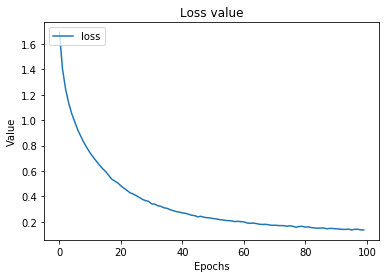

In [68]:
#p
plt.plot(history.history['loss'])
plt.title("Loss value")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(['loss'], loc='upper left')
plt.show()

In [70]:
score = model.evaluate(X_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 38s 4ms/step
[0.73488177099227903, 0.80689999999999995]
